# Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Prepare train test split datasets

In [2]:
df = pd.read_csv('../../data/final_features_df.csv')
df.head()

,Unnamed: 0,Age,Income,faves_pca0,faves_pca1,unfaves_pca0,unfaves_pca1,accessories,alcohol,animamted,...,Drama.2,Entertainment (Variety Shows),Factual,Learning,Music,News,Religion &amp; Ethics,Sport.1,Weather,Rating_bin
0,0,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,1,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,62,1,-0.321485,0.0786,-0.19967,-0.200645,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df_0 = df.fillna(0)

In [4]:
# Y = df_0.pop('Rating_bin')
# X = df_0

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

df = df_0.sample(frac = 1)
train_frac = 0.8
test_frac = 0.1

X_train = df[[c for c in df.columns if c != 'Rating_bin']].iloc[:int(len(df) * train_frac)].values
y_train = df.Rating_bin.iloc[:int(len(df) * train_frac)].values

X_test = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values
y_test = df.Rating_bin.iloc[int(len(df) * train_frac):int(len(df) * (train_frac+test_frac))].values

X_valid = df[[c for c in df.columns if c != 'Rating_bin']].iloc[int(len(df) * (train_frac+test_frac)):].values
y_valid = df.Rating_bin.iloc[int(len(df) * (train_frac+test_frac)):].values

## Baseline Models

### Plug-in Models
#### Simple: LDA

In [6]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3110
           1       0.43      0.15      0.22       502

    accuracy                           0.85      3612
   macro avg       0.65      0.56      0.57      3612
weighted avg       0.81      0.85      0.82      3612



In [8]:
confusion_matrix(y_test, y_pred)

array([[3015,   95],
       [ 429,   73]])

#### Complex: Naive Bayes

In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      3110
           1       0.25      0.64      0.36       502

    accuracy                           0.69      3612
   macro avg       0.59      0.67      0.58      3612
weighted avg       0.83      0.69      0.74      3612



array([[2173,  937],
       [ 183,  319]])

In [10]:
prior_probabilities = df.groupby('Rating_bin').size().div(len(df))
prior_probabilities

prior_0 = prior_probabilities.iloc[0]
prior_1 = prior_probabilities.iloc[1]


clf = GaussianNB(priors = [prior_0, prior_1])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      3110
           1       0.25      0.64      0.36       502

    accuracy                           0.69      3612
   macro avg       0.59      0.67      0.58      3612
weighted avg       0.83      0.69      0.74      3612



array([[2173,  937],
       [ 183,  319]])

## Risk Minimization
### Simple: Decision Tree

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3110
           1       0.42      0.42      0.42       502

    accuracy                           0.84      3612
   macro avg       0.66      0.66      0.66      3612
weighted avg       0.84      0.84      0.84      3612



array([[2822,  288],
       [ 291,  211]])

#### Complex: Neural Networks

In [12]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3110
           1       0.00      0.00      0.00       502

    accuracy                           0.86      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.74      0.86      0.80      3612



/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

array([[3110,    0],
       [ 502,    0]])

### Hyperparameters search

In [13]:
def hyperparameter_tunning(clf, parameters):
    clf = clf

    grid_search = GridSearchCV(clf, parameters)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)

    print(grid_search.best_params_)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    return pd.DataFrame(grid_search.cv_results_)

#### LDA

In [14]:
parameters = {
    'solver': ('svd', 'lsqr', 'eigen'),
    'priors': [None, [0.5, 0.5]]
}


In [15]:
results = hyperparameter_tunning(LinearDiscriminantAnalysis(), parameters)
results

/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 605, in fit
    self._solve_eigen(
  File "/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.

{'priors': None, 'solver': 'lsqr'}
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3110
           1       0.43      0.15      0.22       502

    accuracy                           0.85      3612
   macro avg       0.65      0.56      0.57      3612
weighted avg       0.81      0.85      0.82      3612

[[3015   95]
 [ 429   73]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.086030,0.166643,0.008611,0.006847,None,svd,"{'priors': None, 'solver': 'svd'}",0.863322,0.858280,0.862952,0.862433,0.857588,0.860915,0.002460,2
1,1.066039,0.030676,0.003546,0.000279,None,lsqr,"{'priors': None, 'solver': 'lsqr'}",0.863495,0.858280,0.862952,0.862433,0.857588,0.860950,0.002495,1
2,1.058714,0.030872,0.000000,0.000000,None,eigen,"{'priors': None, 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,2.015714,0.142116,0.003479,0.000204,"[0.5, 0.5]",svd,"{'priors': [0.5, 0.5], 'solver': 'svd'}",0.724221,0.729884,0.723482,0.732134,0.722616,0.726467,0.003810,3
4,1.135473,0.159954,0.003584,0.000609,"[0.5, 0.5]",lsqr,"{'priors': [0.5, 0.5], 'solver': 'lsqr'}",0.662457,0.664302,0.668628,0.677626,0.672435,0.669089,0.005499,4
5,1.082857,0.047173,0.000000,0.000000,"[0.5, 0.5]",eigen,"{'priors': [0.5, 0.5], 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


#### Naive Bayes

In [16]:
parameters = {
    'priors': [None, [0.5, 0.5]],
    'var_smoothing': (1e-9, 0.0001, 0.01, 0.1)
}

In [17]:
results = hyperparameter_tunning(GaussianNB(), parameters)
results

{'priors': None, 'var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3110
           1       0.00      0.00      0.00       502

    accuracy                           0.86      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.74      0.86      0.80      3612

[[3110    0]
 [ 502    0]]


/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_priors,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195105,0.017635,0.040723,0.007959,None,0.0,"{'priors': None, 'var_smoothing': 1e-09}",0.706228,0.687835,0.679010,0.717252,0.689047,0.695875,0.013855,4
1,0.185716,0.003361,0.037231,0.000697,None,0.0001,"{'priors': None, 'var_smoothing': 0.0001}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
2,0.182531,0.002828,0.036744,0.000498,None,0.01,"{'priors': None, 'var_smoothing': 0.01}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
3,0.180235,0.000703,0.035932,0.000454,None,0.1,"{'priors': None, 'var_smoothing': 0.1}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
4,0.180446,0.000936,0.036754,0.001097,"[0.5, 0.5]",0.0,"{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}",0.488062,0.437619,0.446617,0.499048,0.467209,0.467711,0.023439,8
5,0.200166,0.016564,0.042115,0.004739,"[0.5, 0.5]",0.0001,"{'priors': [0.5, 0.5], 'var_smoothing': 0.0001}",0.475779,0.478283,0.479495,0.450770,0.475688,0.472003,0.010717,7
6,0.195395,0.027279,0.037415,0.001777,"[0.5, 0.5]",0.01,"{'priors': [0.5, 0.5], 'var_smoothing': 0.01}",0.476817,0.478976,0.482436,0.452847,0.475688,0.473353,0.010508,5
7,0.220858,0.040257,0.043965,0.009889,"[0.5, 0.5]",0.1,"{'priors': [0.5, 0.5], 'var_smoothing': 0.1}",0.476298,0.478976,0.482090,0.451981,0.475861,0.473041,0.010763,6


#### Decision Trees

In [18]:
parameters = {
    'criterion': ('gini', 'entropy', 'log_loss'),
    'splitter': ('best', 'random')
}

In [19]:
results = hyperparameter_tunning(DecisionTreeClassifier(), parameters)
results

{'criterion': 'gini', 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3110
           1       0.42      0.42      0.42       502

    accuracy                           0.84      3612
   macro avg       0.66      0.66      0.66      3612
weighted avg       0.84      0.84      0.84      3612

[[2822  288]
 [ 291  211]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.112332,0.114057,0.008217,0.000138,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.837024,0.854646,0.844437,0.841322,0.843225,0.844131,0.005829,1
1,1.565184,0.165723,0.008764,0.000323,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.839792,0.844956,0.843572,0.836996,0.841149,0.841293,0.002805,6
2,1.133276,0.027520,0.008164,0.000301,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.837024,0.854646,0.844437,0.841322,0.843225,0.844131,0.005829,1
3,1.286530,0.110650,0.008669,0.000296,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.838754,0.844783,0.843918,0.848071,0.840111,0.843127,0.003347,4
4,1.145667,0.033736,0.008118,0.000336,log_loss,best,"{'criterion': 'log_loss', 'splitter': 'best'}",0.837024,0.854646,0.844437,0.841322,0.843225,0.844131,0.005829,1
5,1.307120,0.145856,0.008484,0.000132,log_loss,random,"{'criterion': 'log_loss', 'splitter': 'random'}",0.834429,0.847205,0.844610,0.841495,0.842879,0.842124,0.004294,5


#### Neural Network

In [20]:
parameters = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    #'solver': ('lbfgs', 'sgd', 'adam'),
    'alpha': (0.0001, 0.001, 0.1)
}

In [21]:
results = hyperparameter_tunning(MLPClassifier(), parameters)
results

{'activation': 'logistic', 'alpha': 0.0001}
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3110
           1       0.00      0.00      0.00       502

    accuracy                           0.86      3612
   macro avg       0.43      0.50      0.46      3612
weighted avg       0.74      0.86      0.80      3612

[[3110    0]
 [ 502    0]]


/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliatessler/Unicamp/mo810/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.002154,1.519619,0.009260,0.000764,identity,0.0001,"{'activation': 'identity', 'alpha': 0.0001}",0.866955,0.405953,0.866932,0.843399,0.866932,0.770034,0.182269,11
1,5.149374,1.047481,0.009461,0.000558,identity,0.001,"{'activation': 'identity', 'alpha': 0.001}",0.866955,0.609794,0.866932,0.869008,0.866932,0.815924,0.103068,9
2,6.522628,1.036446,0.010452,0.001346,identity,0.1,"{'activation': 'identity', 'alpha': 0.1}",0.866955,0.866932,0.857588,0.866932,0.286901,0.749062,0.231109,12
3,5.194272,1.654358,0.015896,0.000783,logistic,0.0001,"{'activation': 'logistic', 'alpha': 0.0001}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
4,4.678296,1.092223,0.016404,0.001150,logistic,0.001,"{'activation': 'logistic', 'alpha': 0.001}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
5,4.242729,1.422245,0.015790,0.000802,logistic,0.1,"{'activation': 'logistic', 'alpha': 0.1}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
6,6.057039,1.626388,0.016171,0.000736,tanh,0.0001,"{'activation': 'tanh', 'alpha': 0.0001}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
7,3.573428,0.519937,0.016286,0.002108,tanh,0.001,"{'activation': 'tanh', 'alpha': 0.001}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
8,3.393533,0.715020,0.015540,0.000405,tanh,0.1,"{'activation': 'tanh', 'alpha': 0.1}",0.866955,0.866932,0.866932,0.866932,0.866932,0.866937,0.000009,1
9,6.800782,1.383601,0.010374,0.000530,relu,0.0001,"{'activation': 'relu', 'alpha': 0.0001}",0.866955,0.866932,0.866932,0.868662,0.504413,0.794779,0.145185,10


# Probability Calibration

/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_90857/4244458037.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_train)
/var/folders/12/tpf_lyk108743n_1zhjxp3dw0000gn/T/ipykernel_90857/4244458037.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_probs_test)


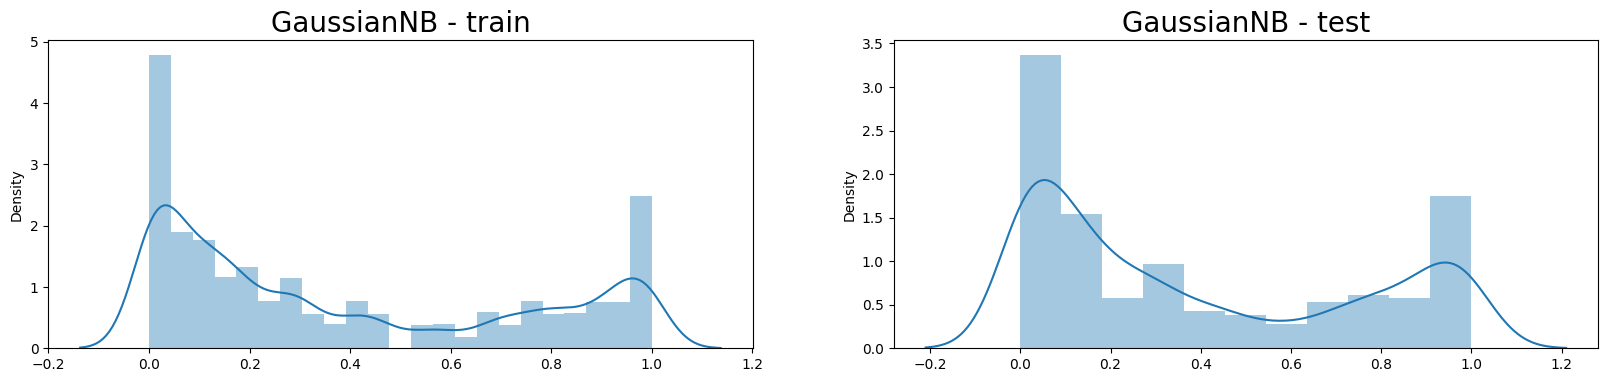

In [27]:
# as seen in class
model_to_probs = {}
model_str_to_trained_model = {}

clf = GaussianNB()
clf.fit(X_train, y_train)

pred_probs_train = clf.predict_proba(X_train)[:,1]
pred_probs_test = clf.predict_proba(X_test)[:,1]
pred_probs_valid = clf.predict_proba(X_valid)[:,1]

model_to_probs['GaussianNB'] = {'train': pred_probs_train, 'test': pred_probs_test, 'valid': pred_probs_valid}

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.distplot(pred_probs_train)
plt.title(f"GaussianNB - train", fontsize=20)

plt.subplot(1,2,2)
sns.distplot(pred_probs_test)
plt.title(f"GaussianNB - test", fontsize=20)

model_str_to_trained_model['GaussianNB'] = clf

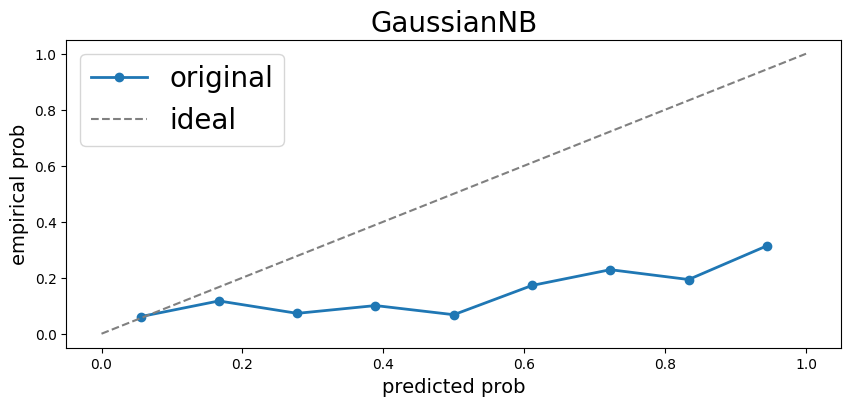

In [28]:
for model_str, pred_prob_dict in model_to_probs.items():
    pred_probs = pred_prob_dict['test']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_test[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'ideal'], fontsize=20)

Brier score of GaussianNB 0.1113466030403412


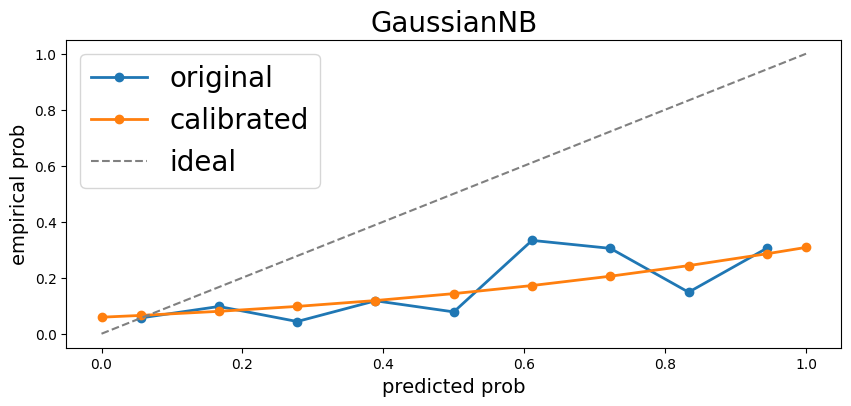

In [29]:
model_str_to_calibrator = {}

for model_str, pred_prob_dict in model_to_probs.items():
    #train calibration model
    lr_model = LogisticRegression()
    lr_model.fit(pred_prob_dict['test'].reshape(-1,1), y_test)
    
    pred_probs = pred_prob_dict['valid']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(y_valid[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    print('Brier score of '+model_str, brier_score_loss(y_test, lr_model.predict_proba(pred_prob_dict['test'].reshape(-1,1))[:,1]))
    
    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)
    
    model_str_to_calibrator[model_str] = lr_model

In [30]:
model_str_to_trained_model

{'GaussianNB': GaussianNB()}

In [31]:
clf = model_str_to_trained_model['GaussianNB']

In [32]:
lr = model_str_to_calibrator['GaussianNB']

In [33]:
uncal_prob = clf.predict_proba(X_test)[:,1][0]
print('Uncalibrated Prob:', uncal_prob)

Uncalibrated Prob: 0.18737414432593208


In [34]:
cal_prob = lr.predict_proba(np.array([[uncal_prob]]))[:,1][0]
print('Calibrated Prob:', cal_prob)

Calibrated Prob: 0.08302747031823098
